In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
sub768F1 = pd.read_csv('submission-768-EB7-1F.csv')
sub768F1.head()

,image_name,target
0,ISIC_0052060,0.022708
1,ISIC_0052349,0.020689
2,ISIC_0058510,0.024828
3,ISIC_0073313,0.027280
4,ISIC_0073502,0.078627


In [5]:
sub768F2 = pd.read_csv('submission-768-EB7-F2.csv')
sub768F2.head()

,image_name,target
0,ISIC_0052060,0.024031
1,ISIC_0052349,0.022537
2,ISIC_0058510,0.024814
3,ISIC_0073313,0.025873
4,ISIC_0073502,0.044269


In [6]:
sub768F3 = pd.read_csv('submission-768-EB7-F3.csv')
sub768F3.head()

,image_name,target
0,ISIC_0052060,0.023581
1,ISIC_0052349,0.021431
2,ISIC_0058510,0.023053
3,ISIC_0073313,0.025582
4,ISIC_0073502,0.030741


In [7]:
arr768F1 = sub768F1.target.to_numpy()
arr768F1

array([0.02270768, 0.02068872, 0.02482787, ..., 0.0595891 , 0.02313699,
       0.133599  ])

In [8]:
arr768F2 = sub768F2.target.to_numpy()
arr768F2

array([0.02403105, 0.02253698, 0.02481354, ..., 0.05354308, 0.02432114,
       0.18761098])

In [9]:
arr768F3 = sub768F3.target.to_numpy()
arr768F3

array([0.02358115, 0.02143148, 0.02305278, ..., 0.03951602, 0.02244549,
       0.06173902])

In [10]:
ct_ensemble = len(arr768F1)
ct_ensemble

10982

In [11]:
ensemble = np.zeros((ct_ensemble,1))

In [12]:
wght768F1 = 1/3
ensemble[:,0] += np.mean(arr768F1.reshape((ct_ensemble,1),order='F'),axis=1) * wght768F1
ensemble

array([[0.00756923],
       [0.00689624],
       [0.00827596],
       ...,
       [0.01986303],
       [0.00771233],
       [0.044533  ]])

In [13]:
wght768F2 = 1/3
ensemble[:,0] += np.mean(arr768F2.reshape((ct_ensemble,1),order='F'),axis=1) * wght768F2
ensemble

array([[0.01557958],
       [0.01440857],
       [0.01654714],
       ...,
       [0.03771073],
       [0.01581938],
       [0.10706999]])

In [14]:
wght768F3 = 1/3
ensemble[:,0] += np.mean(arr768F3.reshape((ct_ensemble,1),order='F'),axis=1) * wght768F3
ensemble

array([[0.02343996],
       [0.02155239],
       [0.0242314 ],
       ...,
       [0.05088273],
       [0.02330121],
       [0.12764967]])

In [15]:
# Double Check
wght768F1+wght768F2+wght768F3

1.0

In [16]:
enseble_image_names = sub768F1.image_name.to_numpy()
enseble_image_names

array(['ISIC_0052060', 'ISIC_0052349', 'ISIC_0058510', ...,
       'ISIC_9997917', 'ISIC_9998234', 'ISIC_9999302'], dtype=object)

In [17]:
submission = pd.DataFrame(dict(image_name=enseble_image_names, target=ensemble[:,0]))
submission = submission.sort_values('image_name') 
submission.to_csv('20200721-768-EB7-3F-Ensemble-submission.csv', index=False)
submission.head()

,image_name,target
0,ISIC_0052060,0.023440
1,ISIC_0052349,0.021552
2,ISIC_0058510,0.024231
3,ISIC_0073313,0.026245
4,ISIC_0073502,0.051212


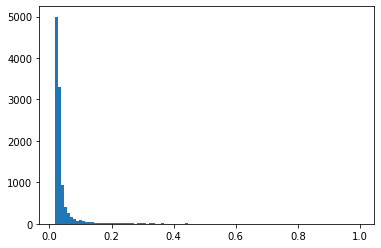

In [18]:
plt.hist(submission.target,bins=100)
plt.show()